In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_ibm_runtime import *


from qiskit.visualization import plot_histogram



In [2]:
bit_string = '010'
n=len(bit_string)
qubit1 = QuantumRegister(n)
qubit2 = QuantumRegister(n)
clbit = ClassicalRegister(n)
circuit = QuantumCircuit(qubit1, qubit2, clbit)


In [3]:
circuit.h(qubit1)
circuit.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=6, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q0'), 0), Qubit(QuantumRegister(3, 'q0'), 1), Qubit(QuantumRegister(3, 'q0'), 2), Qubit(QuantumRegister(3, 'q1'), 0), Qubit(QuantumRegister(3, 'q1'), 1), Qubit(QuantumRegister(3, 'q1'), 2)), clbits=())

In [4]:
circuit.cx(qubit1, qubit2)


In [5]:
circuit.barrier()
circuit.cx(qubit1[0],qubit2[0])
circuit.cx(qubit1[0],qubit2[2])
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=6, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q0'), 0), Qubit(QuantumRegister(3, 'q0'), 1), Qubit(QuantumRegister(3, 'q0'), 2), Qubit(QuantumRegister(3, 'q1'), 0), Qubit(QuantumRegister(3, 'q1'), 1), Qubit(QuantumRegister(3, 'q1'), 2)), clbits=())

In [6]:
circuit.measure(qubit2,clbit)
circuit.h(qubit1)
circuit.barrier()
circuit.measure(qubit1,clbit)
circuit.draw()

┌───┐ ░                 ░            ░ ┌───┐       ░ ┌─┐      
q0_0: ┤ H ├─░───■─────────────░───■────■───░─┤ H ├───────░─┤M├──────
      ├───┤ ░   │             ░   │    │   ░ ├───┤       ░ └╥┘┌─┐   
q0_1: ┤ H ├─░───┼────■────────░───┼────┼───░─┤ H ├───────░──╫─┤M├───
      ├───┤ ░   │    │        ░   │    │   ░ ├───┤       ░  ║ └╥┘┌─┐
q0_2: ┤ H ├─░───┼────┼────■───░───┼────┼───░─┤ H ├───────░──╫──╫─┤M├
      └───┘ ░ ┌─┴─┐  │    │   ░ ┌─┴─┐  │   ░ └┬─┬┘       ░  ║  ║ └╥┘
q1_0: ──────░─┤ X ├──┼────┼───░─┤ X ├──┼───░──┤M├────────░──╫──╫──╫─
            ░ └───┘┌─┴─┐  │   ░ └───┘  │   ░  └╥┘ ┌─┐    ░  ║  ║  ║ 
q1_1: ──────░──────┤ X ├──┼───░────────┼───░───╫──┤M├────░──╫──╫──╫─
            ░      └───┘┌─┴─┐ ░      ┌─┴─┐ ░   ║  └╥┘┌─┐ ░  ║  ║  ║ 
q1_2: ──────░───────────┤ X ├─░──────┤ X ├─░───╫───╫─┤M├─░──╫──╫──╫─
            ░           └───┘ ░      └───┘ ░   ║   ║ └╥┘ ░  ║  ║  ║ 
c0: 3/═════════════════════════════════════════╩═══╩══╩═════╩══╩══╩═
                                               0   1  2     0  1  2

In [8]:
service = QiskitRuntimeService()
backend = service.backend('ibmq_qasm_simulator')
backend

<IBMBackend('ibmq_qasm_simulator')>

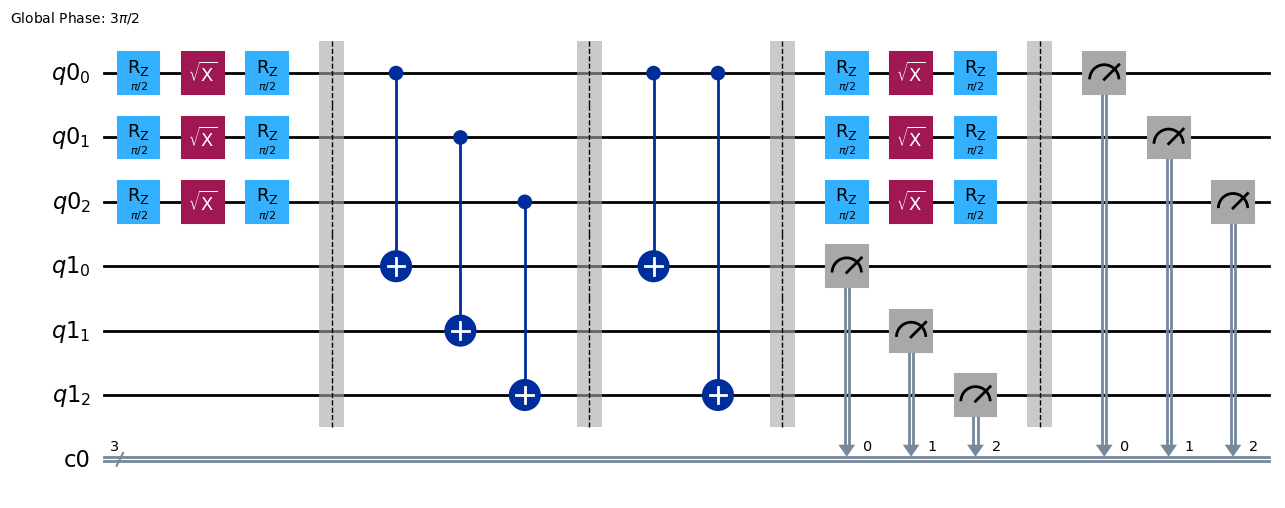

In [9]:
from qiskit import transpile
built = transpile(circuit, backend)
built.draw('mpl', style = 'iqp')

In [11]:
job = backend.run(built)
job.job_id
count = job.result().get_counts()
count

{'101': 992, '010': 969, '000': 1019, '111': 1020}